In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
hpq_data = pd.read_csv('dataset/HeartPredictionQuantumDataset.csv')
#print(hpq_data.head())
#print(hpq_data.isnull().sum()) # 결측치 확인

X = hpq_data.iloc[:,:-1].values
#print(X)
y = hpq_data.iloc[:,-1].values
#print(y)

XColumns = list(hpq_data.columns[:-1])

# 스케일링 처리
# 데이터 프레임으로 변환
Xdf = pd.DataFrame(X, columns = XColumns)     
#print(Xdf)

# 데이터 전처리: 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xdf)
X_scaled = pd.DataFrame(X_scaled, columns=Xdf.columns)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 머신러닝 모델
## 랜덤포레스트
rf_model = RandomForestClassifier(random_state=42, n_estimators=100) # n_esimators : 모델을 구성하는 결정 틀의 개수수
# Random Forest 모델 생성
# 하이퍼파라미터 튜닝을 위해 GridSearchCV 사용
param_grid = {
    'n_estimators': [50, 100, 200],  # 트리의 개수
    'max_depth': [4, 6, 8],       # 트리의 최대 깊이
    'min_samples_split': [2, 4],  # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2]    # 리프 노드에 있어야 하는 최소 샘플 수
}
# 교차 검증 cv =3 : 훈련 데이터를 3개의 FOLD(묶음)으로 나누어서 두개를 훈련, 나머지는 검증 용도로 활용
# 교차 검증은 최적의 하이퍼 파라미터 값을 찾기 위해서 사용됨
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')

## 의사결정나무
dtr_model = DecisionTreeClassifier(random_state=42)\

## KNN
k = 5  # K 값 설정 (이웃의 수)
knn = KNeighborsClassifier(n_neighbors=k) # 모델 생성

# 학습
## 랜덤포레스트
# 모델 학습 (GridSearchCV를 통한 최적의 파라미터를 반영한 학습)
grid_search.fit(X_train, y_train)
# 최적의 모델 저장
best_rf_model = grid_search.best_estimator_
rf_y_pred = best_rf_model.predict(X_test)

## 의사결정나무
dtr_model.fit(X_train, y_train)
dtr_y_pred = dtr_model.predict(X_test)

## KNN
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)


# 평가
rf_accuracy = accuracy_score(y_test, rf_y_pred) # 정확도 계산
print(f"Accuracy: {rf_accuracy:.4f}") # 결과 출력 : 1.0000

dtr_accuracy = accuracy_score(y_test, dtr_y_pred)
print(f"Accuracy: {dtr_accuracy:.4f}")

knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f"Accuracy: {knn_accuracy:.4f}")
# 랜덤 포레스트 - 0.9300
# 의사결정나무 - 0.9400
# KNN - 0.9300
# 셋 다 양호하게 값이 나옴
# 의사결정나무의 정확도가 가장 높다
# 의사결정나무 사용하기로 결정

Accuracy: 0.9300
Accuracy: 0.9400
Accuracy: 0.9300


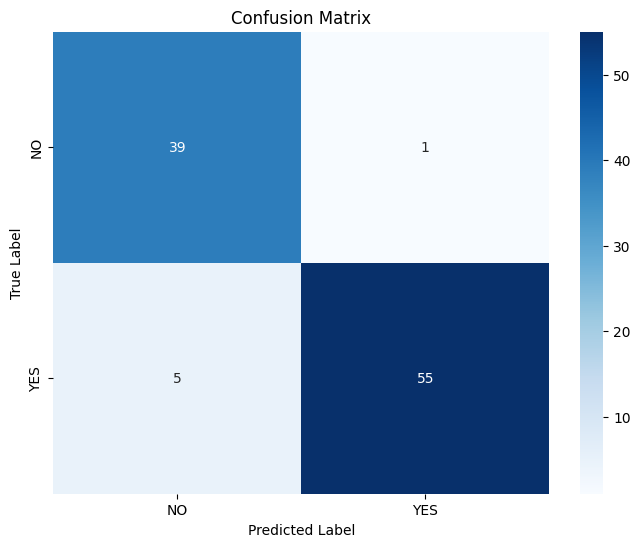

In [18]:
# 의사결정나무 혼동 행렬 (Confusion Matrix) 시각화
dtr_cm = confusion_matrix(y_test, dtr_y_pred)
plt.figure(figsize=(8, 6))
# annot=True : 각 셀안의 숫자값을 표시, fmt="d" : 숫자값을 정수형태로 표시, cmap="Blues" : 색상값은 블루
sns.heatmap(dtr_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['NO','YES'], yticklabels=['NO','YES'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

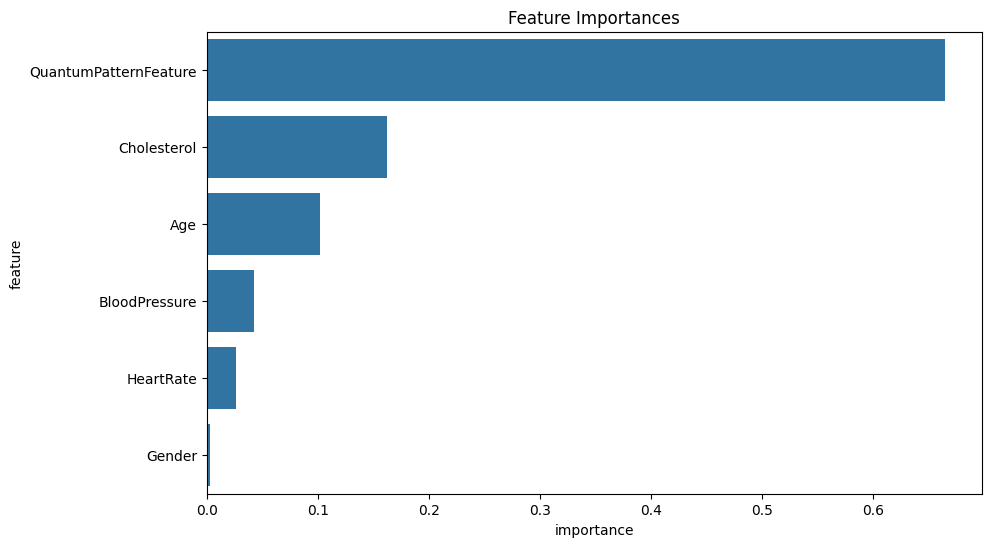

'\nAge: 환자의 나이(년)\nGender: 0(여성), 1(남성)\nBloodPressure: 혈압 수치\nCholesterol: 콜레스테롤 수치\nHeartRate: 분당 심박수\nQuantumPatternFeature: 가장 성능이 좋은 모델을 구별할 수 있도록 맞춤 설계된 기능\nHeartDisease(대상): 0(심장병 없음), 1(심장병 있음)\n'

In [19]:
# Feature Importance 시각화
feature_importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': XColumns, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()
"""
Age: 환자의 나이(년)
Gender: 0(여성), 1(남성)
BloodPressure: 혈압 수치
Cholesterol: 콜레스테롤 수치
HeartRate: 분당 심박수
QuantumPatternFeature: 가장 성능이 좋은 모델을 구별할 수 있도록 맞춤 설계된 기능
HeartDisease(대상): 0(심장병 없음), 1(심장병 있음)
"""